# Run benchmark

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi
from skimage import morphology
from quanfima import simulation
from quanfima import morphology as mrph
from quanfima import utils
from quanfima import visualization as vis
import time
from multiprocessing import cpu_count

## Initialization of the result dataframe

In [3]:
result = pd.DataFrame(columns=["n fibers", "volume", "radius_lim", "elapsed time", "parallelization"])

## CPU available 

In [4]:
n_cpu = cpu_count()
cpu_use = int(n_cpu / 2)
print("nb cpu used = ", cpu_use)

nb cpu used =  18


## Parameters

In [5]:
lst_fibers = [1, 2, 3, 4, 5, 10, 15, 20]
nb_run = 10

## Batch 1 sequential

In [6]:
for iteration in range(1, nb_run + 1):
    print(iteration)
    for n_fib in lst_fibers:
        print(n_fib)
        start = time.perf_counter()
        res = simulation.simulate_fibers((128, 128, 128),
                                         n_fibers=n_fib,
                                         max_fails=100,
                                         radius_lim=(2, 8),
                                         gap_lim=(3, 5))
        end = time.perf_counter()
        result = result.append({"n fibers": n_fib, "volume": (128, 128, 128), "radius_lim": (
            2, 8), "elapsed time": end - start, "parallelization": "no"}, ignore_index=True)

print("batch sequential 1 ended")

1
1
2
3
4
5
10
15
20
2
1
2
3
4
5
10
15
20
3
1
2
3
4
5
10
15
20
4
1
2
3
4
5
10
15
20
5
1
2
3
4
5
10
15
20
6
1
2
3
4
5
10
15
20
7
1
2
3
4
5
10
15
20
8
1
2
3
4
5
10
15
20
9
1
2
3
4
5
10
15
20
10
1
2
3
4
5
10
15
20
batch sequential 1 ended


## Batch 2 sequential

In [7]:
for iteration in range(1, nb_run + 1):
    print(iteration)
    for n_fib in lst_fibers:
        print(n_fib)
        start = time.perf_counter()
        res = simulation.simulate_fibers((256, 256, 256),
                                         n_fibers=n_fib,
                                         max_fails=100,
                                         radius_lim=(2, 8),
                                         gap_lim=(3, 5))
        end = time.perf_counter()
        result = result.append({"n fibers": n_fib, "volume": (256, 256, 256), "radius_lim": (
            2, 8), "elapsed time": end - start, "parallelization": "no"}, ignore_index=True)

print("batch sequential 2 ended")

1
1
2
3
4
5
10
15
20
2
1
2
3
4
5
10
15
20
3
1
2
3
4
5
10
15
20
4
1
2
3
4
5
10
15
20
5
1
2
3
4
5
10
15
20
6
1
2
3
4
5
10
15
20
7
1
2
3
4
5
10
15
20
8
1
2
3
4
5
10
15
20
9
1
2
3
4
5
10
15
20
10
1
2
3
4
5
10
15
20
batch sequential 2 ended


## Batch 1 CPU parallelized

In [8]:
for iteration in range(1, nb_run + 1):
    print(iteration)
    for n_fib in lst_fibers:
        print(n_fib)
        start = time.perf_counter()
        res = simulation.simulate_fibers((128, 128, 128),
                                         n_fibers=n_fib,
                                         max_fails=100,
                                         radius_lim=(2, 8),
                                         gap_lim=(3, 5),
                                         parallelization="CPU")
        end = time.perf_counter()
        result = result.append({"n fibers": n_fib, "volume": (128, 128, 128), "radius_lim": (
            2, 8), "elapsed time": end - start, "parallelization": f"yes ({cpu_use})"}, ignore_index=True)

#print("\n\n", result)
print("batch CPU 1 ended")

1
1
2
3
4
5
10
15
20
2
1
2
3
4
5
10
15
20
3
1
2
3
4
5
10
15
20
4
1
2
3
4
5
10
15
20
5
1
2
3
4
5
10
15
20
6
1
2
3
4
5
10
15
20
7
1
2
3
4
5
10
15
20
8
1
2
3
4
5
10
15
20
9
1
2
3
4
5
10
15
20
10
1
2
3
4
5
10
15
20
batch CPU 1 ended


## Batch 2 CPU parallelized

In [9]:
for iteration in range(1, nb_run + 1):
    print(iteration)
    for n_fib in lst_fibers:
        print(n_fib)
        start = time.perf_counter()
        res = simulation.simulate_fibers((256, 256, 256), 
                                         n_fibers=n_fib, 
                                         max_fails=100,
                                         radius_lim=(2, 8), 
                                         gap_lim=(3, 5), 
                                         parallelization="CPU")
        end = time.perf_counter()
        result = result.append({"n fibers": n_fib, "volume": (256, 256, 256), "radius_lim": (
            2, 8), "elapsed time": end - start, "parallelization": f"yes ({cpu_use})"}, ignore_index=True)

#print("\n\n", result)
print("batch CPU 2 ended")

1
1
2
3
4
5
10
15
20
2
1
2
3
4
5
10
15
20
3
1
2
3
4
5
10
15
20
4
1
2
3
4
5
10
15
20
5
1
2
3
4
5
10
15
20
6
1
2
3
4
5
10
15
20
7
1
2
3
4
5
10
15
20
8
1
2
3
4
5
10
15
20
9
1
2
3
4
5
10
15
20
10
1
2
3
4
5
10
15
20
batch CPU 2 ended


In [ ]:
#for iteration in range(1, nb_run + 1):
#	for n_fib in [1, 2, 3, 4, 5, ]:
#		start = time.perf_counter()
#		volume, lat_ref, azth_ref, diameter, _, _ = \
#		  simulation.simulate_fibers((128,128,128), n_fibers=n_fib, max_fails=100,
#									 radius_lim=(8, 16), gap_lim=(3,5))
#		end = time.perf_counter()
#		result=result.append({"n fibers":n_fib, "volume":(128,128,128), "radius_lim":(16,24), "elapsed time":end - start, "parallelization": "no"}, ignore_index=True)

#print("batch 5 fin")


In [ ]:
#for iteration in range(1, nb_run + 1):
#	for n_fib in lst_fibers:
#		start = time.perf_counter()
#		volume, lat_ref, azth_ref, diameter, _, _ = \
#		  simulation.simulate_fibers((128,128,128), n_fibers=n_fib, max_fails=100,
#									 radius_lim=(8, 16), gap_lim=(3,5), parallelization="CPU")
#		end = time.perf_counter()
#		result=result.append({"n fibers":n_fib, "volume":(128,128,128), "radius_lim":(16,24), "elapsed time":end - start, "parallelization": f"yes ({cpu_use})"}, ignore_index=True)
#print("batch 6 fin")


In [10]:
result.to_csv("benchmark_parallelization.csv")
#exit()

# Results 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("benchmark_parallelization.csv")

## Results for 128x128x128 

In [19]:
filter_data = data[(data.volume == "(128, 128, 128)") & (data.radius_lim == "(2, 8)")]

<AxesSubplot:xlabel='n fibers', ylabel='elapsed time'>

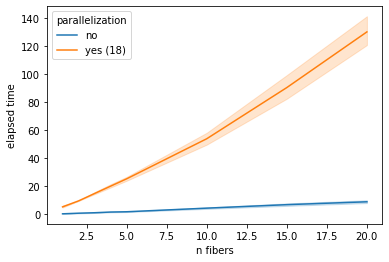

In [20]:
sns.lineplot(data=filter_data, x="n fibers", y='elapsed time', hue="parallelization")

## Results for 256x256x256 

In [21]:
filter_data2 = data[(data.volume == "(256, 256, 256)") & (data.radius_lim == "(2, 8)")]

<AxesSubplot:xlabel='n fibers', ylabel='elapsed time'>

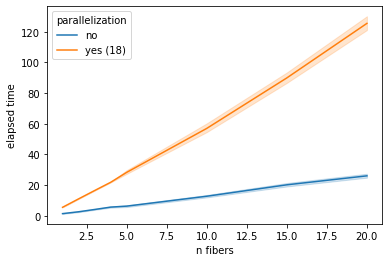

In [22]:
sns.lineplot(data=filter_data2, x="n fibers", y='elapsed time', hue="parallelization")